# Naive Bayes 

1. Gaussian Naive Bayes: Assumes features follow a Gaussian (normal) distribution. 

2. Multinomial Naive Bayes: Suitable for discrete features, often used in text classification where features represent word counts or frequencies.   

3. Bernoulli Naive Bayes: Designed for binary features (presence or absence of a feature).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("placementiq.csv")
df.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [3]:
x= df.iloc[:,1:-1]
y = df["placement"]

<Axes: xlabel='cgpa', ylabel='Density'>

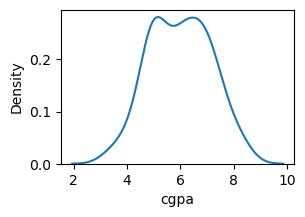

In [35]:
plt.figure(figsize=(3,2))
sns.kdeplot(data=df["cgpa"])

In [34]:
# normalization/scaling:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns = x.columns)
x.head(3)

,cgpa,iq
0,0.710958,-0.014593
1,-0.079972,-0.442331
2,-0.607258,-0.064915


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test , y_train, y_test = train_test_split(x,y , train_size=0.2 ,random_state=42 )

In [26]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [27]:
Gb = GaussianNB()
Gb.fit(x_train,y_train)

GaussianNB()

In [28]:
Gb.score(x_test,y_test)*100     #  This gives most accuracy as GaussianNB() is best for normal distributed dataset

92.5

In [29]:
Mb = MultinomialNB()            # This is best for text based data
Mb.fit(x_train,y_train)

ValueError: Negative values in data passed to MultinomialNB (input X).

In [ ]:
Mb.score(x_test,y_test)*100

In [30]:
Bb = BernoulliNB()
Bb.fit(x_train,y_train)

BernoulliNB()

In [31]:
Bb.score(x_test,y_test)*100

92.5

In [32]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Perfexet\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


<Axes: >

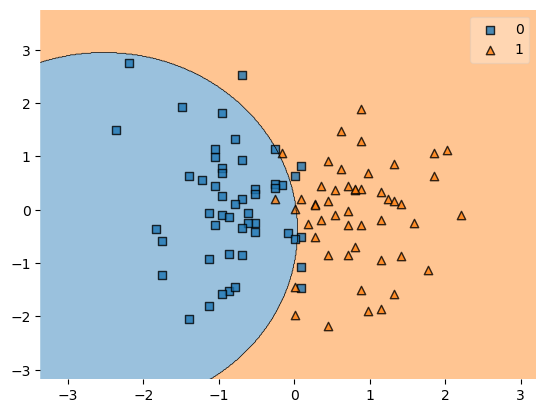

In [33]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),Gb)